## **Álgebra Linear** | Data Science
> Realização do trabalho para o curso de Álgebra Linar utilizando a análise de componentes principais em um conjunto de dados
##### Este conjunto de dados contém informações sobre o custo de vida em quase 5.000 cidades em todo o mundo
##### Os dados foram coletados raspando o site da Numbeo, https://www.numbeo.com


In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore") # Ignorar avisos para não poluir o display
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formatação para Notacão Científica
pd.set_option('display.max_columns', 100) # Aumentar o Limite da Visualização das Colunas
pd.set_option('display.max_rows', 100) # Aumentar o Limite da Visualização das Linhas
plt.style.use('ggplot') # Utilização dos Gráficos no estilo ggplot2, library(ggplot2) em R

### Continuação do Notebook Anterior
* Tratamento e Importação de Dados

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/cost-of-living.csv')
dic = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/dictionary.csv')

In [19]:
# Seleção de linhas onde a qualidade dos dados são boas
df = df.loc[df['data_quality'] == 1, :]

# Remover uma coluna a mais contendo o index, e a qualidade dos dados
if len(df.columns) == 59:
    df = df.iloc[:, 1:58].reset_index(drop=True)
    
# Remover linhas com dados vazios, pois impede no processo de análise
df = df.dropna(how='any', axis=0)

# Renomeação das colunas
df.columns = ['Nome da cidade', 'Nome do país', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Leite (comum), (1 litro)', 'Pão Branco Fresco (500g)', 'Arroz (branco), (1kg)', 'Ovos (comuns) (12)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Alface (1 cabeça)', 'Água (garrafa de 1,5 litro, no mercado)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Gasolina (1 litro)', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Fitness Club, mensalidade para 1 adulto', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Cinema, Lançamento Internacional, 1 Lugar', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa']

# Criação da coluna Local com a união das colunas da cidade e país
df['Local'] = df['Nome da cidade'] + ' • ' + df['Nome do país']

# Organização das colunas
df = df[['Local', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Leite (comum), (1 litro)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Água (garrafa de 1,5 litro, no mercado)', 'Arroz (branco), (1kg)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Pão Branco Fresco (500g)', 'Alface (1 cabeça)', 'Ovos (comuns) (12)', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', 'Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Fitness Club, mensalidade para 1 adulto', 'Cinema, Lançamento Internacional, 1 Lugar', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)']]

# Utilizando o Local como Index
df = df.set_index('Local')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, Delhi • India to Kalach-na-Donu • Russia
Data columns (total 55 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Salário Líquido Médio Mensal (Após Impostos)                                            735 non-null    float64
 1   Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa              735 non-null    float64
 2   1 par de jeans (Levis 501 ou similar)                                                   735 non-null    float64
 3   1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)                                    735 non-null    float64
 4   1 par de tênis de corrida Nike (gama média)                                             735 non-null    float64
 5   1 par de sapatos masculinos de negócios em c

### Suposição para a Análise
![](https://fatecspgov-my.sharepoint.com/personal/gabriel_silva637_fatec_sp_gov_br/Documents/Image/Web/photo-1581763638046-a3568aca35af.jpg)


> Suponha que eu queira procurar um bom lugar para passar as féfias, porém, não quero ter um custo muito alto com a gasolina, internet, apartamento para a familia no centro, refeições em qualquer restaurante e o básico como aguá e energia, mas quero aproveitar qualquer tipo de entreterimento e lazer e com isso estou disposto a gastar qualquer valor. Qual é o lugar mais adequado para a viagem?

## Análise dos Componentes Principais
* Utilização de Todas as Variáveis
* Descrevendo passo a passo para o Entendimento

### Primeiro Passo
* Criação da Matriz de Covariância, para isso é necessário a padronização das variáveis para que sejam comparáveis entre si
> ( x - Média ) / Desv. Padrão

In [65]:
# Pegando as médias das colunas
mean = np.mean(df, axis=0)

# Padronizando os dados | A matriz subtraido pelo vetor de médias,m x - média
P = df - np.tile(mean, (df.shape[0], 1))

# Dividindo pelo desvio padrão
M = P / df.std()

#### Matriz de Correlação

In [90]:
# Matriz de Correlação
Cor = M.T.dot(M) / (df.shape[0] - 1)
Cor.iloc[:3, :8]

,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro
Salário Líquido Médio Mensal (Após Impostos),1.000000,-0.473359,0.300042,0.216484,0.179353,0.479052,0.559748,0.462215
"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",-0.473359,1.000000,-0.462515,-0.036550,-0.019166,-0.334601,-0.366543,-0.271910
1 par de jeans (Levis 501 ou similar),0.300042,-0.462515,1.000000,0.442749,0.437092,0.650222,0.414701,0.333548


In [89]:
# Mesmo resultado usando diretamente os dados com df.corr()
df.corr().iloc[:3, :8]

,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro
Salário Líquido Médio Mensal (Após Impostos),1.000000,-0.473359,0.300042,0.216484,0.179353,0.479052,0.559748,0.462215
"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",-0.473359,1.000000,-0.462515,-0.036550,-0.019166,-0.334601,-0.366543,-0.271910
1 par de jeans (Levis 501 ou similar),0.300042,-0.462515,1.000000,0.442749,0.437092,0.650222,0.414701,0.333548


#### Matriz de Covariância

In [88]:
# Matriz de Covariância | Matriz Transposta
Cov = P.T.dot(P) / (df.shape[0] - 1)
Cov.iloc[:3, :8]

,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro
Salário Líquido Médio Mensal (Após Impostos),2.571745e+06,-3951.152672,11516.897240,3804.257541,10712.627741,28565.916690,3.084135e+06,1.986601e+06
"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",-3.951153e+03,27.091879,-57.621533,-2.084651,-3.715533,-64.758745,-6.554986e+03,-3.793123e+03
1 par de jeans (Levis 501 ou similar),1.151690e+04,-57.621533,572.899430,116.125311,389.659094,578.698544,3.410369e+04,2.139687e+04


In [87]:
# Mesmo resultado usando diretamente os dados com df.cov()
df.cov().iloc[:3, :8]

,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro
Salário Líquido Médio Mensal (Após Impostos),2.571745e+06,-3951.152672,11516.897240,3804.257541,10712.627741,28565.916690,3.084135e+06,1.986601e+06
"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",-3.951153e+03,27.091879,-57.621533,-2.084651,-3.715533,-64.758745,-6.554986e+03,-3.793123e+03
1 par de jeans (Levis 501 ou similar),1.151690e+04,-57.621533,572.899430,116.125311,389.659094,578.698544,3.410369e+04,2.139687e+04


### Segundo Passo
* Encontrar os Autovetores e os Autovalores da Matriz de Covariância

In [105]:
autovalores, autovetores = np.linalg.eig(Cov)
print(f'>> 1º Autovalor\n{autovalores[0]}\n\n>> 1º Autovetor\n{autovetores[0]}\n')

>> 1º Autovalor
156704992.4841355

>> 1º Autovetor
[-2.08397926e-02  1.32513672e-01  3.51078693e-04 -9.76190343e-02
 -6.81281743e-01  3.34672829e-01 -5.91612806e-01 -1.94091141e-01
  2.52917560e-04  8.93638757e-02  8.45937299e-03 -1.94810055e-02
 -7.30159318e-03 -2.21763276e-03  9.39626418e-03  2.87598740e-03
  2.31609087e-03 -8.01470098e-04 -6.12762612e-03 -5.11516002e-04
  2.23951482e-03  1.59960962e-03  9.59782228e-05  1.49812371e-03
  9.71359470e-04 -5.17002195e-04  4.23960169e-04 -3.63881097e-04
 -9.29496960e-04 -3.49540089e-04 -3.74068963e-04 -1.39272086e-04
  2.63234250e-04 -2.13805283e-04 -9.37843450e-05 -9.72002014e-05
 -1.62439585e-04 -2.76878873e-05 -6.53091218e-05  1.30809241e-04
  1.44280236e-06 -1.02265119e-04  1.02238544e-04  9.66598403e-05
  7.86637026e-06  6.75224834e-05 -6.43800433e-05  9.51610580e-06
 -1.68868015e-04  6.28127419e-05 -1.26563462e-04  1.09650243e-04
 -5.75824255e-05  5.76468031e-05 -4.71408652e-05]



### Ordenação
* Organizando os Autovalores e os Autovetores do menor para o maior

In [124]:
auto = [(np.abs(autovalores[i]), autovetores[:, i]) for i in range(len(autovalores))]
auto.sort()
auto.reverse()

# Não esta mostrando o vetor completamente
pd.DataFrame(auto, columns=['Autovalor', 'Autovetor']).head()

,Autovalor,Autovetor
0,156704992.48,"[-0.020839792579188186, -4.702344748648644e-06..."
1,64003332.68,"[0.13251367188311608, -0.00025247454863597013,..."
2,19166313.71,"[0.0003510786929327981, -1.5417301122396005e-0..."
3,11013136.30,"[-0.09761903426578368, 0.00026824554405801296,..."
4,2058246.51,"[-0.6812817427655917, 0.0007806973631280912, -..."


### Utilização | PCA
* Com os autovalores estão representando a variabilidade dos nossos dados, ou seja, quão acumulado a variância dos nossos dados, e eles estão ordenados pelos autovalores, que representa a quantidade de variabilidade dos nossos dados. **Para o calculo da variância explicada de cada autovalor é dada por**\
![](https://fatecspgov-my.sharepoint.com/personal/gabriel_silva637_fatec_sp_gov_br/Documents/Image/Web/Captura%20de%20tela%202022-12-03%20121652.png)

In [127]:
# Soma  dos Autovalores
total_sum = sum(autovalores)
total_sum

255233902.34962192

In [134]:
# Visualização da porcentagem de variância dos dados totais que a primeira variavel acumula
var = [(i / total_sum) * 100 for i in sorted(autovalores, reverse=True)]
var[:4] # Pequena Amostra

[61.39662131148999, 25.07634451813057, 7.509313429794129, 4.314919058342878]

In [155]:
# Soma acumulativa
acum_var = np.cumsum(var)

# Criando um DataFrame para a visualização
comp = ['PCA %s' %i for i in range(1, len(autovalores) +1)]

# Criação do DataFrame para facilitar a Visualização
pca = pd.DataFrame({'Componente':comp, 'Autovalor (𝜆)':autovalores, 'Variância % (fi)':var, 'Freq. Acumulada (Fi)':acum_var}).set_index('Componente')
display(pca)

# Apartir da utilização de 4 componentes, não é possivel a visualização, pois é o Plano R4,
# Então, no minimo é possivel a visualização no Plano R3 com 3 componentes, 93%

,Autovalor (𝜆),Variância % (fi),Freq. Acumulada (Fi)
Componente,,,
PCA 1,156704992.48,61.40,61.40
PCA 2,64003332.68,25.08,86.47
PCA 3,19166313.71,7.51,93.98
PCA 4,11013136.30,4.31,98.30
PCA 5,2058246.51,0.81,99.10
PCA 6,1726217.33,0.68,99.78
PCA 7,350268.21,0.14,99.92
PCA 8,89294.69,0.03,99.95
PCA 9,83371.61,0.03,99.98


Como excolhemos cerca de 93% da variência acumulada, usaremos 3 Componentes. Logo, precisamos multiplicar a Matriz Original pela Matriz de Autovetores truncada até o componente principal
> **Matriz** = Matriz de Feautures * Matriz de Auto Vetores\
> **Matriz com Componentes Principais** = Matriz de Feautures * Matriz Truncada em Componentes

In [301]:
# Refazendo o tratamento de Dados para obter somente os nomes do país
# Assim facilita a visualização agrupando cada um deles
temp = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/cost-of-living.csv')
temp = temp.loc[temp['data_quality'] == 1, :]
temp = temp.iloc[:, 1:58].reset_index(drop=True)   
temp = temp.dropna(how='any', axis=0)
temp.columns = ['Nome da cidade', 'País', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Leite (comum), (1 litro)', 'Pão Branco Fresco (500g)', 'Arroz (branco), (1kg)', 'Ovos (comuns) (12)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Alface (1 cabeça)', 'Água (garrafa de 1,5 litro, no mercado)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Gasolina (1 litro)', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Fitness Club, mensalidade para 1 adulto', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Cinema, Lançamento Internacional, 1 Lugar', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa']
temp = temp[['País', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Leite (comum), (1 litro)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Água (garrafa de 1,5 litro, no mercado)', 'Arroz (branco), (1kg)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Pão Branco Fresco (500g)', 'Alface (1 cabeça)', 'Ovos (comuns) (12)', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', 'Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Fitness Club, mensalidade para 1 adulto', 'Cinema, Lançamento Internacional, 1 Lugar', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)']]

In [302]:
n_comp = pca.shape[0]
autovetores = [i[1] for i in auto]
A = autovetores

# Multiplicar a matriz pela matriz com todos os autovetores
X_ = np.dot(df, np.array(A).T)
new = pd.DataFrame(X_,columns = x)
new['País'] = list(temp['País'])
new = new.set_index('País')

# Visualização do DataFrame de Componentes Principais
# Para deixar as coisas mais simples, colocaremos somente o país
display(new)

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,PCA 33,PCA 34,PCA 35,PCA 36,PCA 37,PCA 38,PCA 39,PCA 40,PCA 41,PCA 42,PCA 43,PCA 44,PCA 45,PCA 46,PCA 47,PCA 48,PCA 49,PCA 50,PCA 51,PCA 52,PCA 53,PCA 54,PCA 55
País,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,-25008.63,-1537.78,7854.82,-930.27,-221.60,-87.77,-35.67,-148.70,-11.87,48.23,10.30,36.68,-19.30,-0.01,-7.79,-12.30,14.61,-6.22,-13.73,-17.82,2.71,-10.29,-1.54,3.59,-10.91,1.60,-0.55,-0.59,1.77,2.15,1.74,-1.47,0.18,0.98,-0.77,0.35,0.38,-0.38,0.52,0.18,0.05,-0.18,-0.26,-0.30,-0.00,0.76,-0.11,0.43,-0.28,0.30,-0.09,-0.54,1.15,0.09,0.10
China,-32981.78,26214.33,3297.73,-7694.56,2713.90,-3851.24,599.87,314.77,-436.21,263.55,22.67,7.11,50.46,-19.77,2.88,-22.19,0.07,-10.75,-21.37,-4.79,-2.11,-3.06,4.36,4.49,-11.56,-3.72,1.17,-3.80,0.32,3.08,1.34,-0.88,1.11,1.05,-0.71,-0.44,2.08,0.23,0.51,0.31,-0.32,-0.25,0.07,-0.22,0.25,0.76,-0.85,0.07,-0.94,-0.12,-0.22,-0.36,0.74,0.13,0.05
Indonesia,-38847.02,4385.68,2775.24,2364.81,636.79,-66.20,442.80,-181.03,24.04,70.24,23.89,59.30,15.73,-11.45,-11.07,-12.01,-4.04,-11.82,-11.98,-7.48,-0.20,-2.39,-2.81,1.87,-19.52,2.45,5.36,0.29,-0.57,-0.19,2.70,-2.18,1.04,0.61,-0.93,0.56,-0.76,-0.28,-0.70,0.54,-0.04,0.09,0.07,0.04,-0.05,0.98,0.24,0.26,-0.48,0.29,-0.17,-0.90,0.79,0.10,0.07
Philippines,-30604.36,7500.03,-2283.44,955.68,973.27,44.12,892.65,-188.52,-239.56,267.48,-38.59,105.52,29.94,-18.74,-10.90,-2.34,20.91,-8.21,-10.44,-0.22,1.97,-7.47,-0.15,5.19,-8.81,1.85,1.97,-1.39,2.19,0.86,2.59,-0.60,0.29,1.26,-0.36,0.72,0.48,0.11,-0.94,-0.26,-0.40,-0.36,0.34,0.59,-0.44,0.63,-0.40,0.60,-0.46,-0.05,-0.11,-0.57,1.41,-0.07,0.02
South Korea,-43407.69,19361.47,954.12,-14086.08,1433.54,-5216.24,-689.24,-760.87,-118.73,-61.04,-11.34,65.24,-30.01,-47.53,-11.26,0.41,3.99,-16.53,-16.24,-27.81,6.42,-10.79,-19.14,7.16,-8.69,10.95,1.52,0.47,1.65,-2.00,4.12,4.58,1.02,3.89,-0.01,-0.46,-0.18,-0.37,-0.04,-0.23,-0.12,-0.03,-0.50,-0.38,-0.22,1.31,-0.59,-0.24,-0.19,0.90,0.10,-0.33,1.14,-0.21,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Canada,-40872.48,16629.89,-4483.88,6759.74,988.96,506.62,229.57,100.35,280.58,-227.90,23.29,65.28,29.20,-16.30,-49.77,-23.18,-1.17,6.76,0.60,-5.32,11.84,-6.55,-2.23,2.20,-13.51,3.73,-5.90,-0.44,4.91,0.95,4.62,2.76,1.53,1.40,0.36,1.44,-0.02,-0.59,-0.09,0.21,0.14,-0.12,-1.37,-0.72,-0.79,-0.10,-0.94,1.28,0.09,0.60,-0.16,-0.92,1.02,0.44,0.05
Norway,-50694.56,-3168.06,-2344.55,-324.69,-2044.35,1866.09,-905.64,-476.67,61.75,-12.84,66.55,88.62,13.72,7.86,-33.17,-45.09,2.42,-4.98,8.10,-9.36,-8.04,-9.82,-5.24,2.68,-13.93,7.75,0.36,-3.65,0.98,3.23,-0.74,-1.06,2.82,-0.14,0.36,-0.38,0.94,-0.19,-0.60,0.77,-0.52,0.80,-0.44,0.60,-0.55,0.38,0.14,0.89,-0.61,-0.12,-0.33,-0.35,1.07,0.45,0.10
Portugal,-37747.68,3602.78,824.73,-357.59,400.01,1148.52,822.39,-10.90,103.82,-166.70,-16.40,60.70,13.63,12.49,-33.52,-31.78,32.76,-1.92,-6.52,1.88,3.66,-2.67,-0.61,5.68,-3.54,0.05,2.10,-4.91,1.11,-0.04,-0.19,0.43,1.23,2.13,-2.18,0.44,0.23,0.57,0.35,0.18,-0.09,-0.21,0.22,0.21,-0.67,0.79,-0.17,0.44,-0.57,0.60,-1.07,-0.22,1.46,0.10,0.14


In [303]:
n_comp = pca.shape[0]
autovetores = [i[1] for i in auto]
A = autovetores[:3]

# Multiplicar a matriz pela matriz com 3 autovetores
X_ = np.dot(df, np.array(A).T)
new = pd.DataFrame(X_,columns = x[0:3])
new['País'] = list(temp['País'])

# Visualização do DataFrame de Componentes Principais
# Para deixar as coisas mais simples, colocaremos somente o país
display(new.set_index('País').head())

,PCA 1,PCA 2,PCA 3
País,,,
India,-25008.63,-1537.78,7854.82
China,-32981.78,26214.33,3297.73
Indonesia,-38847.02,4385.68,2775.24
Philippines,-30604.36,7500.03,-2283.44
South Korea,-43407.69,19361.47,954.12


### Visualização
* Platagem dos Componentes, visualização do seu comportamento
> Infelizmente, não mostraremos a legenda pois são muitos países, pelo menos tentamos reduzi-los excluindo a cidade, mas mesmos asim ficou muito extenso, outra maneira seria agrpar por continente, mas seria muito trabalhoso com cada país. Existe uma biblioteca para isso, mas vamos continuar como está

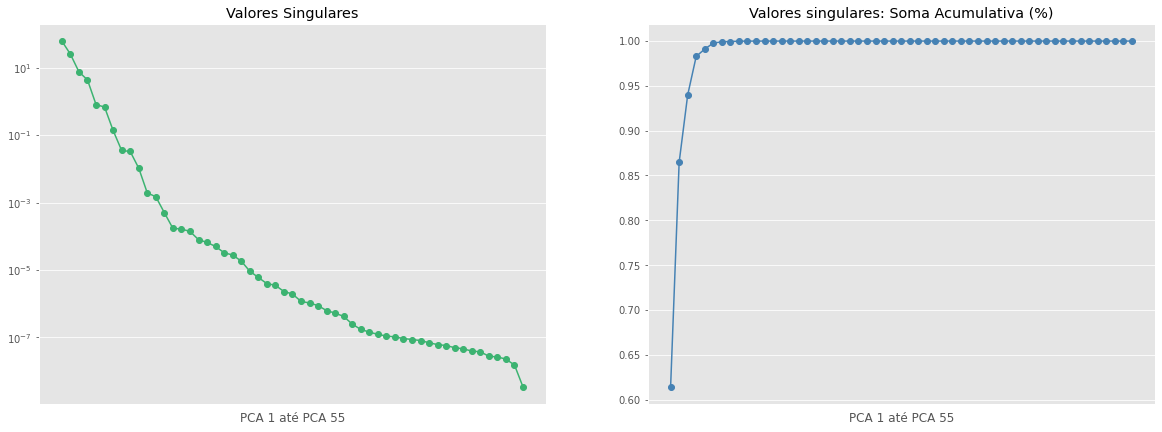

In [304]:
fig = plt.figure(figsize=(20,7))
specs = gridspec.GridSpec( nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )

ax1.semilogy(pca['Variância % (fi)'], '-o',  color='mediumseagreen')
ax1.set_title('Valores Singulares')
ax1.set_xlabel('PCA 1 até PCA 55')
ax1.set_xticks([])

ax2.plot(np.cumsum(pca['Variância % (fi)']) / np.sum(pca['Variância % (fi)']), '-o', color='steelblue')
ax2.set_title('Valores singulares: Soma Acumulativa (%)');
ax2.set_xlabel('PCA 1 até PCA 55')
ax2.set_xticks([]);
plt.savefig('plot01.png', dpi=120)

#### Visualização dos 3 PCAs
* Temos 3 variáveis explicando o nosso conjuntop de dados

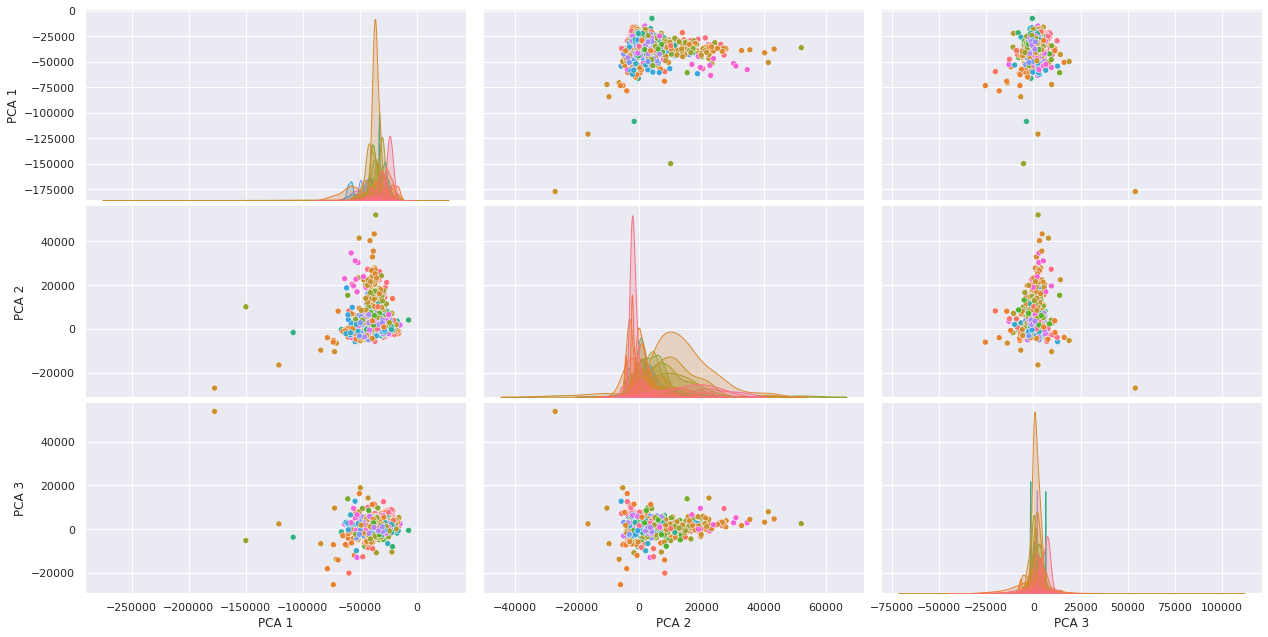

In [327]:
sns.set(rc={'figure.figsize':(21,9)})
sns.pairplot( new, vars=x[:3], hue='País', height=3, aspect=10/5 )._legend.remove()
plt.savefig('plot02.png', dpi=120)
plt.show()

#### Visualização de Algumas Variáveis

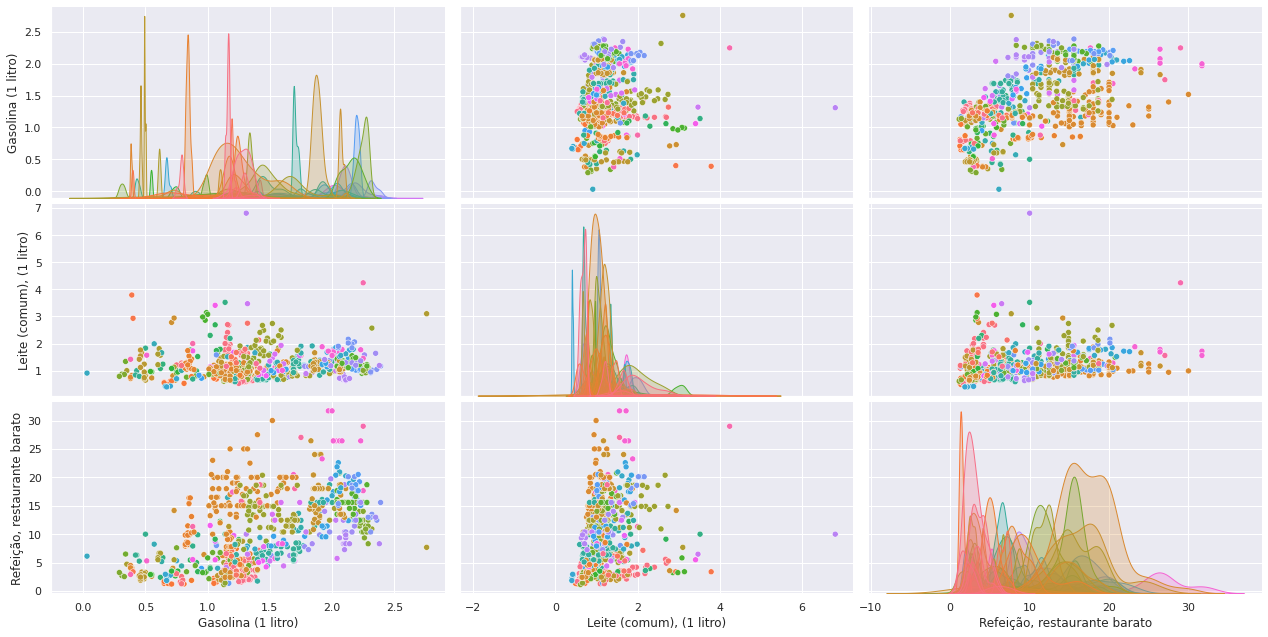

In [326]:
sns.set(rc={'figure.figsize':(21,9)})
sns.pairplot( temp, vars=['Gasolina (1 litro)', 'Leite (comum), (1 litro)', 'Refeição, restaurante barato'],
              hue='País', height=3, aspect=10/5 )._legend.remove()
plt.savefig('plot03.png', dpi=120)
plt.show()

### Condição
* Para melhorar a visualização, colocarei somente poucas variaveis dos países onde tem maior quantidade de cidades

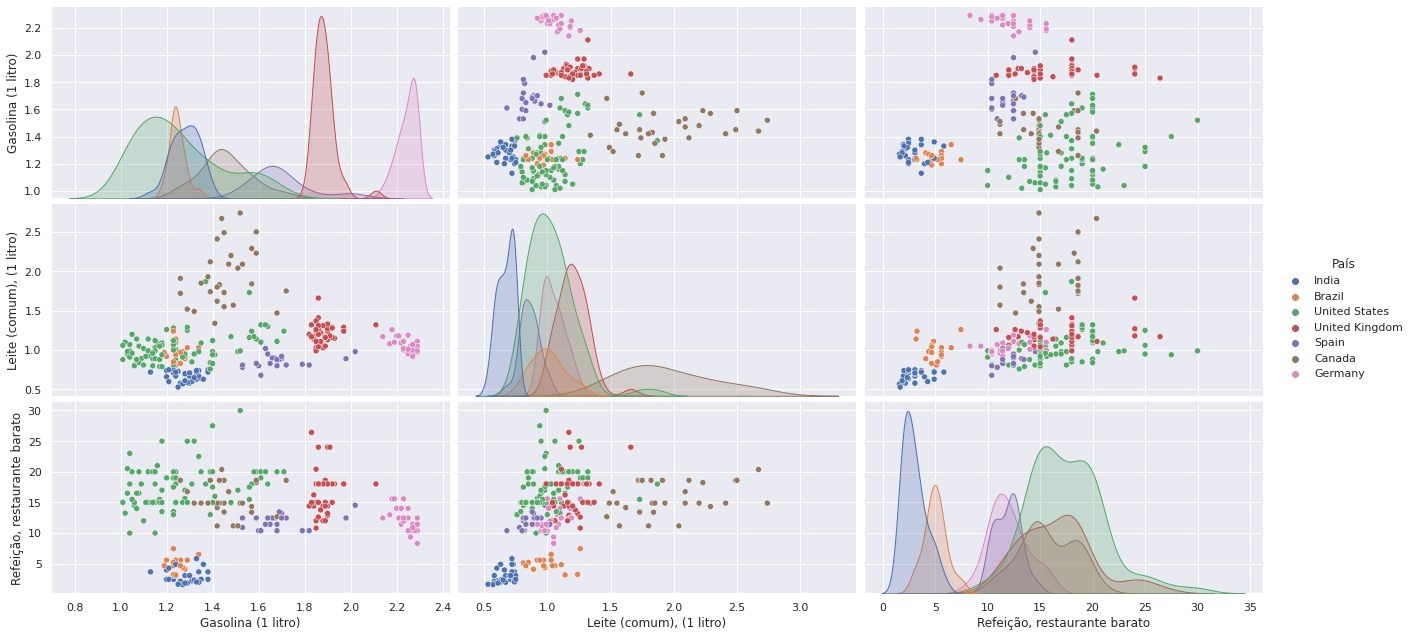

In [357]:
neo = temp.loc[ (temp['País'] == 'Brazil') | (temp['País'] == 'Canada') | (temp['País'] == 'Spain') |
         (temp['País'] == 'United States') | (temp['País'] == 'United Kingdom') | (temp['País'] == 'India')| (temp['País'] == 'Germany'), :]

sns.set(rc={'figure.figsize':(21,9)})
sns.pairplot( neo, vars=['Gasolina (1 litro)', 'Leite (comum), (1 litro)', 'Refeição, restaurante barato'],
              hue='País', height=3, aspect=10/5 )
plt.savefig('plot04.png', dpi=120)
plt.show()

## Principal Compoent Analysis usando **SkLearn**
* Nota: Durante a execução, foi visto que somente 3 componentes principais explicam cerca de **91% da variabilidade dos dados**

In [441]:
# Utilizando uma amostra de países selecionados
neo_df = temp.loc[ (temp['País'] == 'Brazil') | (temp['País'] == 'Canada') | (temp['País'] == 'Spain') |
         (temp['País'] == 'United States') | (temp['País'] == 'United Kingdom') | (temp['País'] == 'India')| (temp['País'] == 'Germany'), :].set_index('País')

In [442]:
# Natriz de Covariância
Cov = neo_df.cov()

# Número de componentes desejaveis
pca = PCA(n_components=3)
pca.fit(neo_df)

# Autovalores | Mesmo que esteja diferente do nosso, não ocorrerá distorções no final
print(f'>> Autovalores (Todos eles)\n{pca.explained_variance_}\n')
print(f'>> Autovetores (Somente 1)\n{pca.components_[0]}')

>> Autovalores (Todos eles)
[94794320.76887453 23530392.62063204 11321716.45438951]

>> Autovetores (Somente 1)
[ 1.11891090e-01 -9.79681309e-05  7.17186263e-04  2.38828403e-04
  9.91901155e-04  1.86744900e-03  1.67757238e-01  1.17102121e-01
  4.92787543e-02  3.82298767e-02  8.57936290e-02  6.40788304e-02
  3.11549929e-01  9.07017999e-02  1.34933982e-05  4.03553374e-05
  3.75043695e-05  8.59915312e-05  1.50413123e-04  2.07665813e-04
  2.46960131e-04  7.08169865e-05  2.71378384e-05  7.95358272e-05
  9.46979197e-05  5.65611477e-05  5.11534620e-05  6.27551752e-05
  3.32374122e-05  5.92313298e-05  3.83357013e-02  9.07454279e-01
  5.38252436e-06  1.24117503e-03  4.47354469e-03  2.42995174e-06
  6.34028415e-05  2.04260640e-03  7.36311665e-05  3.71022826e-05
  7.05097877e-04  9.43053628e-04  2.76328533e-04  4.17039587e-04
  1.60707491e-03  4.56983705e-05  8.24087359e-05  1.18177236e-04
  2.44020054e-04  1.21477695e-04  1.13312439e-04  9.88501462e-05
  2.67047131e-05  6.60829694e-06  2.3259790

In [443]:
# Variância explicada | 91%
list(pca.explained_variance_ratio_)

[0.6739459224363488, 0.16729074095764096, 0.08049242378159108]

In [460]:
# Transformação
C = pca.transform(neo_df)
new = pd.DataFrame(C, columns=['PCA 1', 'PCA 2', 'PCA 3'])
display(new)

,PCA 1,PCA 2,PCA 3
0,-14493.85,-4857.80,2105.06
1,-15255.56,-5108.08,2948.71
2,-12104.35,-5459.05,-678.40
3,-5010.88,1274.94,3359.09
4,30090.14,-6875.34,-4532.72
...,...,...,...
243,26394.06,-9566.52,9048.87
244,13587.24,254.02,-871.58
245,5326.29,12931.55,2770.89
246,10313.33,2568.63,1671.78


### Observação
* Percebe-se que está tudo está certo, pois ao aplicar a covariância sobre a Matriz da Transformação, deve-se obter os autovalores como resultado na diagonal principal

In [461]:
display(pd.DataFrame(pca.explained_variance_, columns=['Autovalores']))
# Aplicação da Covariância
display(new.cov())

,Autovalores
0,94794320.77
1,23530392.62
2,11321716.45


,PCA 1,PCA 2,PCA 3
PCA 1,94794320.77,-0.00,0.00
PCA 2,-0.00,23530392.62,-0.00
PCA 3,0.00,-0.00,11321716.45


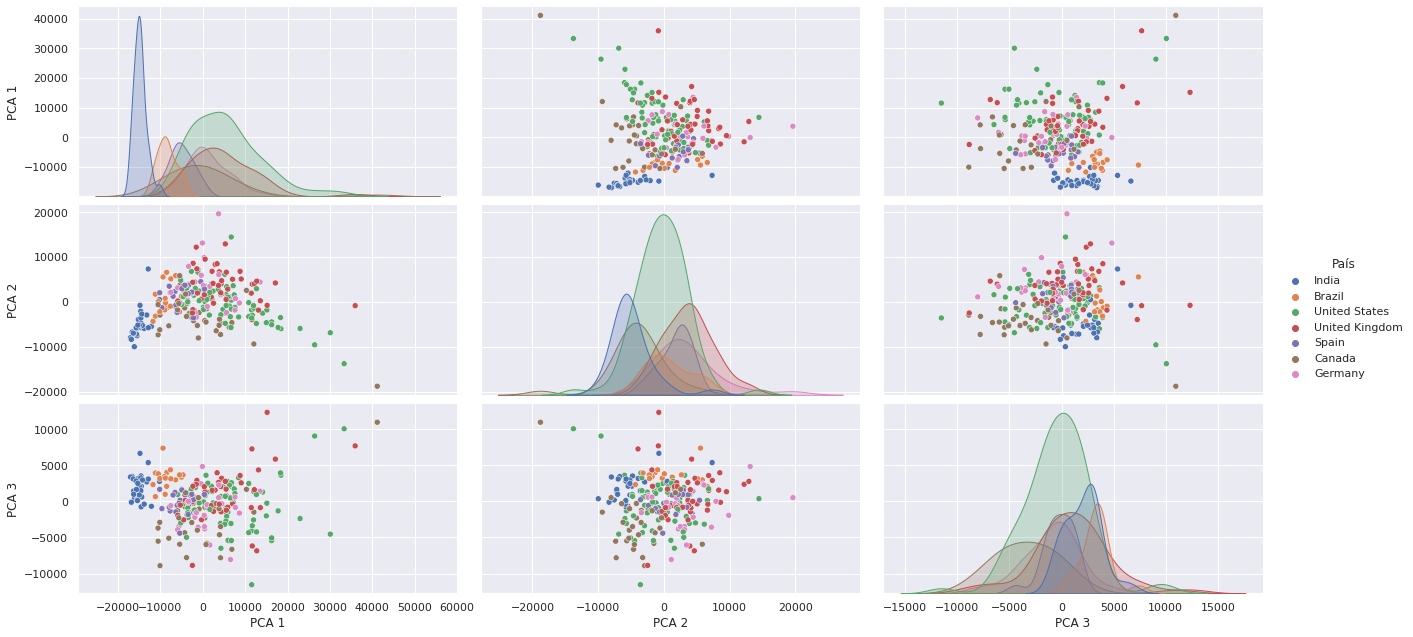

In [519]:
new['País'] = list(neo_df.index)
sns.set(rc={'figure.figsize':(21,9)})
sns.pairplot( new, vars=['PCA 1', 'PCA 2', 'PCA 3'], hue='País', height=3, aspect=10/5 )
plt.savefig('plot05.png', dpi=120)
plt.show()

### Plotagem dos Autovetores

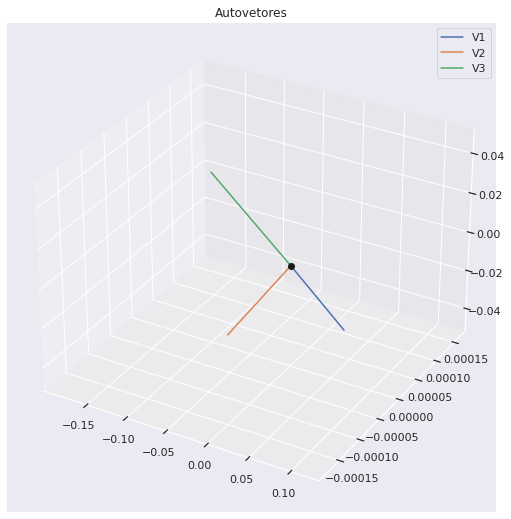

In [518]:
M = np.array(list(pca.components_))
rows, cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
maxes = 1.1*np.amax(abs(M), axis = 0)

ax = plt.axes(projection='3d')    
for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)


ax.plot(0,0,'ok') #<-- plot a black point at the origin
ax.axis('auto')  #<-- set the axes to the same scale
ax.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
ax.set_title('Autovetores')
ax.grid(b=True, which='major') #<-- plot grid lines
plt.savefig('plot06.png', dpi=120)


### Ordenação
> Ordenação pelo primeiro componente, e sua análise

In [492]:
neo_df['PCA 1'] = list(new['PCA 1'])
neo_df['PCA 2'] = list(new['PCA 2'])
neo_df['PCA 3'] = list(new['PCA 3'])
neo_df.sort_values('PCA 1', ascending=False)

,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro),PCA 1,PCA 2,PCA 3
País,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canada,3411.77,4.41,52.76,33.46,79.60,99.68,2210.39,1849.91,912.28,755.01,1542.36,1186.00,22335.84,18382.58,1.91,1.74,1.81,3.06,10.80,11.17,13.43,3.80,1.39,3.40,3.69,2.02,1.77,2.16,2.37,2.69,760.25,59692.52,1.26,59.56,185.15,0.26,2.61,74.45,2.83,1.23,22.34,44.71,11.17,18.61,67.01,1.82,3.81,8.93,14.70,11.17,5.21,5.96,2.06,2.69,12.66,41161.02,-18792.37,10964.53
United Kingdom,3223.16,3.09,66.06,42.04,75.67,111.54,9697.02,5818.21,1403.88,1147.12,2912.85,2112.07,28828.24,33744.06,1.28,1.73,0.99,2.07,9.44,9.27,14.42,2.67,1.38,2.52,2.07,1.12,1.12,1.07,0.70,2.47,1411.38,48047.07,1.92,34.83,195.94,0.13,3.78,79.62,5.53,1.79,21.62,50.72,12.01,15.01,60.06,1.89,3.44,7.51,10.81,9.61,6.01,6.01,2.59,2.97,15.62,35950.00,-841.31,7683.90
United States,5000.00,5.11,47.50,42.25,82.86,88.33,2220.95,1858.57,1500.00,1100.00,2333.33,1900.00,22000.00,22206.25,1.14,1.42,1.77,3.68,11.52,8.53,15.56,4.52,1.61,3.34,4.04,1.50,2.34,2.81,2.46,4.40,650.00,50450.00,1.07,70.62,340.06,0.08,1.75,50.00,2.25,1.40,36.00,65.00,12.00,16.50,57.50,2.64,4.26,10.00,8.75,10.00,4.25,5.75,2.95,2.75,8.00,33348.72,-13771.00,10055.05
United States,6066.38,5.40,62.13,57.42,94.15,145.80,14784.44,9531.27,3851.51,2337.00,7146.84,4365.28,25000.00,23879.37,1.25,2.32,2.43,7.95,16.58,17.88,20.57,5.52,2.50,4.98,6.22,4.16,3.73,4.13,2.68,3.93,2444.17,41333.33,1.29,69.18,171.08,0.10,2.75,129.50,4.25,1.86,32.50,106.15,18.00,25.00,100.00,2.72,5.38,10.00,37.86,16.50,8.00,10.00,3.15,3.95,15.00,30090.14,-6875.34,-4532.72
United States,2903.00,5.34,42.14,31.88,72.14,77.14,1953.65,2058.06,1480.17,1318.33,2433.33,2233.00,229

### Combinação
> Combinação dos Componentes umas as outras para visualização

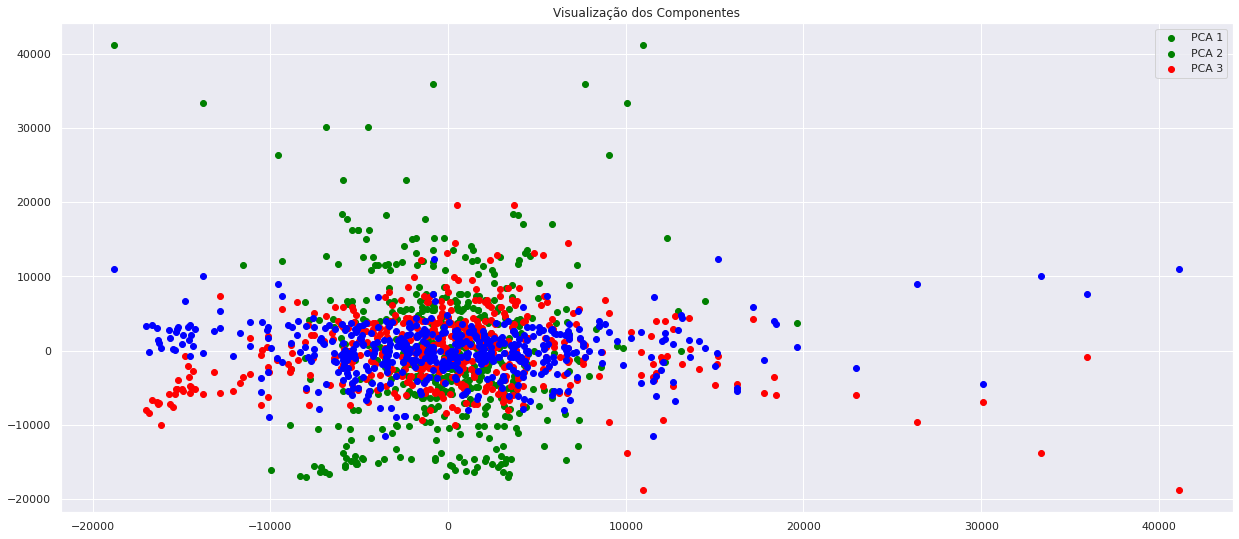

In [517]:
plt.scatter(new['PCA 2'], new['PCA 1'], color='Green')
plt.scatter(new['PCA 3'], new['PCA 1'], color='Green')

plt.scatter(new['PCA 1'], new['PCA 2'], color='Red')
plt.scatter(new['PCA 3'], new['PCA 2'], color='Red')

plt.scatter(new['PCA 1'], new['PCA 3'], color='Blue')
plt.scatter(new['PCA 2'], new['PCA 3'], color='Blue')

plt.legend(['PCA 1', 'PCA 2', 'PCA 3'])
plt.title('Visualização dos Componentes')
plt.savefig('plot07.png', dpi=120)

## Fim da Análise
Obrigado e espero que o grupo obtenha nota máxima pois eu gastei **QUASE 7 HORA DO MEU SÁBADO** e essa é a 3º vez
![](https://fatecspgov-my.sharepoint.com/personal/gabriel_silva637_fatec_sp_gov_br/Documents/Image/Web/Captura%20de%20Tela%20(50).png)
